<a href="https://colab.research.google.com/github/Phantom-Ren/PR_TH/blob/master/%E7%BB%86%E8%83%9E%E8%81%9A%E7%B1%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# 模式识别·第五次作业·聚类算法

#### 纪泽西 17375338

#### Last Modified:12nd,April,2020

</center>

<table align="center">
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/Phantom-Ren/PR_TH/blob/master/KMeans.ipynb"> 
        <img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" /><br>Run in Google Colab</a></td>
</table>


## Part2: 细胞聚类

### Section1:制作数据集

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import os
import cv2
import tqdm
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/My Drive/Pattern Recognition/Dataset/cells.zip (Unzipped Files)/cells/test'

classes = {'TIL-E','TIL-S','normal','UDH','ADH','IDC','ILC','Muc_C','DCIS_1','DCIS_2','DCIS_3','MC_C','MC_E','MC_M'}


In [0]:
x_train = []
y_train0 = []
x_test = []
y_test0 = []

In [24]:
thres = np.ones([51,51])*255
for filename in tqdm.tqdm(os.listdir(path),unit='files',desc = path):
    catagory=filename.split('_')[0]
    y_test0.append(catagory)
    gray_img = cv2.imread(path + "/" + filename,cv2.IMREAD_GRAYSCALE)
    gray_img = thres-gray_img
    x_test.append(gray_img)


流式输出内容被截断，只能显示最后 5000 行内容。
/content/drive/My Drive/Pattern Recognition/Dataset/cells.zip (Unzipped Files)/cells/test:  20%|█▉        | 1230/6229 [09:30<44:19,  1.88files/s]
/content/drive/My Drive/Pattern Recognition/Dataset/cells.zip (Unzipped Files)/cells/test:  20%|█▉        | 1231/6229 [09:30<39:25,  2.11files/s]
/content/drive/My Drive/Pattern Recognition/Dataset/cells.zip (Unzipped Files)/cells/test:  20%|█▉        | 1232/6229 [09:31<44:56,  1.85files/s]
/content/drive/My Drive/Pattern Recognition/Dataset/cells.zip (Unzipped Files)/cells/test:  20%|█▉        | 1233/6229 [09:31<46:31,  1.79files/s]
/content/drive/My Drive/Pattern Recognition/Dataset/cells.zip (Unzipped Files)/cells/test:  20%|█▉        | 1234/6229 [09:32<45:22,  1.83files/s]
/content/drive/My Drive/Pattern Recognition/Dataset/cells.zip (Unzipped Files)/cells/test:  20%|█▉        | 1235/6229 [09:32<37:01,  2.25files/s]
/content/drive/My Drive/Pattern Recognition/Dataset/cells.zip (Unzipped Files)/cells/test:  20%|█

In [31]:
x_test1 = np.asarray(x_test)
print(x_test1.shape)
print(np.unique(y_test0))

(6229, 51, 51)
['DCIS' 'IDC' 'ILC' 'MC' 'Muc' 'TIL' 'normal']


In [32]:
y_test=np.zeros(6229)
cat1 = ['TIL'] #Lymphocyte Label:0
cat2 = ['normal']#Normal Epithelial Label:1
cat3 = ['IDC','ILC','DCIS','Muc','MC']#Malignant Epithelial Label:2
for i in tqdm.tqdm(range(6229)):
  if y_test0[i] in cat1:
    y_test[i] = 0
  if y_test0[i] in cat2:
    y_test[i] = 1
  if y_test0[i] in cat3:
    y_test[i] = 2


100%|██████████| 6229/6229 [00:00<00:00, 411645.55it/s]


In [34]:
print(np.unique(y_test),y_test.shape)

[0. 1. 2.] (6229,)


In [36]:
%cd /content/drive/My Drive/Pattern Recognition/Dataset

np.save(file="raw_image.npy",arr=x_test1)
np.save(file="train_label.npy",arr=y_test)

/content/drive/My Drive/Pattern Recognition/Dataset


In [0]:
np.save(file="raw_label.npy",arr=y_test0)

### Section2:聚类分析

In [0]:
%cd /content/drive/My Drive/Pattern Recognition/Dataset

x_test = np.load(file="raw_image.npy")
y_test = np.load(file="train_label.npy")

In [0]:
from sklearn.cluster import AgglomerativeClustering
from time import *

(6229, 2601) (6229,)


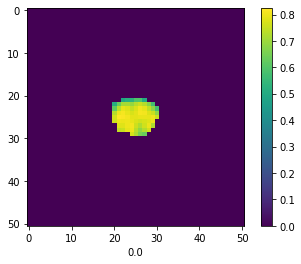

In [53]:
x_test_c = x_test1.reshape(x_test1.shape[0],-1)
x_test_c = x_test_c.reshape(x_test_c.shape[0],-1)
x_test_c = x_test_c/255.0
y_test_c = y_test
print(x_test_c.shape,y_test_c.shape)
plt.imshow(x_test_c[1,:].reshape([51,51]))
plt.xlabel(y_test_c[1])
plt.colorbar()
plt.show()

In [143]:
st = time()
ac = AgglomerativeClustering(n_clusters=12,affinity='euclidean')
labels = ac.fit_predict(x_test_c)
et = time()
print('Time Usage:',et-st,'s')

Time Usage: 51.75371479988098 s


In [55]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import fowlkes_mallows_score
import seaborn as sns
sns.set()
def draw_confusionmatrix(ytest, yhat):
    plt.figure(figsize=(10,7))
    cm = confusion_matrix(ytest, yhat)
    ax = sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    acc = accuracy_score(ytest, yhat)
    score_f=fowlkes_mallows_score(y_test,yhat)
    print(f"Sum Axis-1 as Classification accuracy: {acc}")
    print('F-Score:',score_f)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Sum Axis-1 as Classification accuracy: 0.23920372451436828
F-Score: 0.2712651464329277


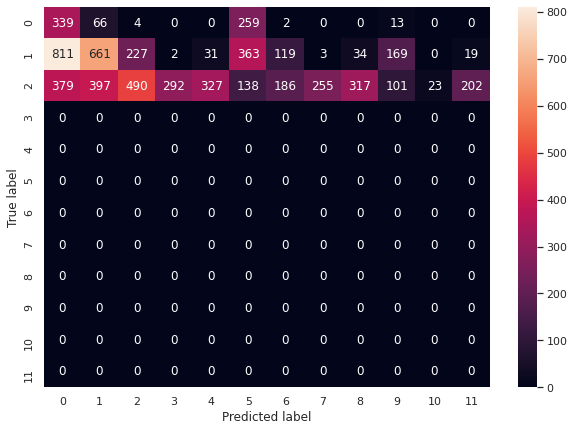

In [144]:
draw_confusionmatrix(y_test_c,labels)

Sum Axis-1 as Classification accuracy: 0.6301171937710708
F-Score: 0.5200500027145227


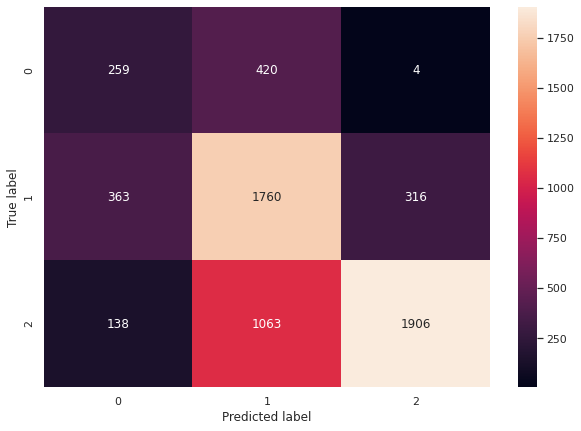

In [145]:
temp=[1,1,2,2,2,0,1,2,2,1,2,2]
y_hat1=np.zeros(6229)
for i in range(0,6229):
  y_hat1[i] = temp[labels[i]]
draw_confusionmatrix(y_test_c,y_hat1)  

### Section3:AutoEncoder对层次聚类法进行优化

In [0]:
encoding_dim = 10


In [0]:
encoder = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128,activation='relu') ,                                   
  tf.keras.layers.Dense(32,activation='relu') ,
  tf.keras.layers.Dense(8,activation='relu') ,
  tf.keras.layers.Dense(encoding_dim) 
])

decoder = tf.keras.models.Sequential([
  tf.keras.layers.Dense(8,activation='relu') ,                                   
  tf.keras.layers.Dense(32,activation='relu') ,
  tf.keras.layers.Dense(128,activation='relu') ,
  tf.keras.layers.Dense(2601,activation='sigmoid') 
])

AE = tf.keras.models.Sequential([
  encoder,                               
  decoder
])

In [106]:
AE.compile(optimizer='adam',loss='binary_crossentropy')
AE.fit(x_test_c,x_test_c,epochs=10,batch_size=256)

Epoch 1/10
25/25 [==============================] - 1s 36ms/step - loss: 0.4883
Epoch 2/10
25/25 [==============================] - 1s 35ms/step - loss: 0.1003
Epoch 3/10
25/25 [==============================] - 1s 37ms/step - loss: 0.0751
Epoch 4/10
25/25 [==============================] - 1s 37ms/step - loss: 0.0697
Epoch 5/10
25/25 [==============================] - 1s 36ms/step - loss: 0.0670
Epoch 6/10
25/25 [==============================] - 1s 36ms/step - loss: 0.0652
Epoch 7/10
25/25 [==============================] - 1s 37ms/step - loss: 0.0625
Epoch 8/10
25/25 [==============================] - 1s 36ms/step - loss: 0.0594
Epoch 9/10
25/25 [==============================] - 1s 38ms/step - loss: 0.0585
Epoch 10/10
25/25 [==============================] - 1s 36ms/step - loss: 0.0581


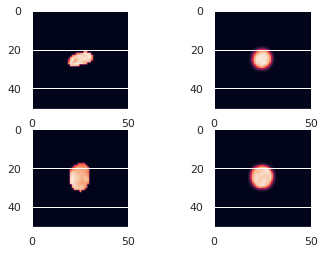

[ -1.6939049   6.3238564   1.7744392 -20.427149   18.41962    33.71928
   2.7896101 -43.81534   -13.67544    30.273424 ]
[ -0.49684596   1.5427805    7.473381   -24.728785    24.647108
  41.03383      7.161074   -62.70727    -16.162838    45.375717  ]


In [109]:
x_encoded = encoder.predict(x_test_c)
x_decoded = decoder.predict(x_encoded)

plt.subplot(2,2,1)
plt.imshow(x_test_c[123,:].reshape([51,51]))
plt.subplot(2,2,2)
plt.imshow(x_decoded[123,:].reshape([51,51]))
plt.subplot(2,2,3)
plt.imshow(x_test_c[456,:].reshape([51,51]))
plt.subplot(2,2,4)
plt.imshow(x_decoded[456,:].reshape([51,51]))
plt.show()
print(x_encoded[123,:])
print(x_encoded[456,:])


In [139]:
st = time()
ac1 = AgglomerativeClustering(n_clusters=12,affinity='euclidean')
labels1 = ac1.fit_predict(x_encoded)
et = time()
print('Time Usage:',et-st,'s')

Time Usage: 1.0903100967407227 s


Sum Axis-1 as Classification accuracy: 0.1086851822122331
F-Score: 0.25337491957118946


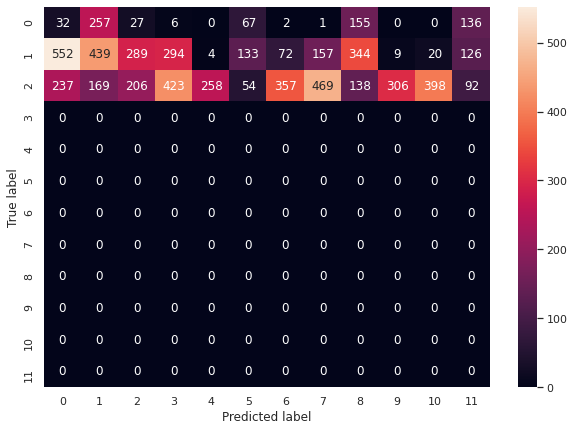

In [140]:
draw_confusionmatrix(y_test_c,labels1)

Sum Axis-1 as Classification accuracy: 0.6482581473751806
F-Score: 0.5425964878550984


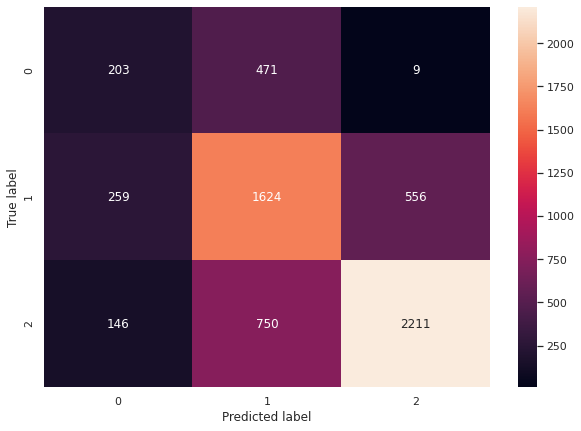

In [141]:
temp=[1,1,1,2,2,0,2,2,1,2,2,0]
y_hat2=np.zeros(6229)
for i in range(0,6229):
  y_hat2[i] = temp[labels1[i]]
draw_confusionmatrix(y_test_c,y_hat2)  

可见，通过AutoEncoder提取图片核心特征，极大程度的缩短了聚类时间，且聚类准确性在相同情况下略微提高约1%。